In [ ]:
#NAME: AKANSHA SHETTY  USN: 22BTRAD002  COURSE: AI/DE  SECTION: A

## Use visualization or statistical methods to detect outliers:

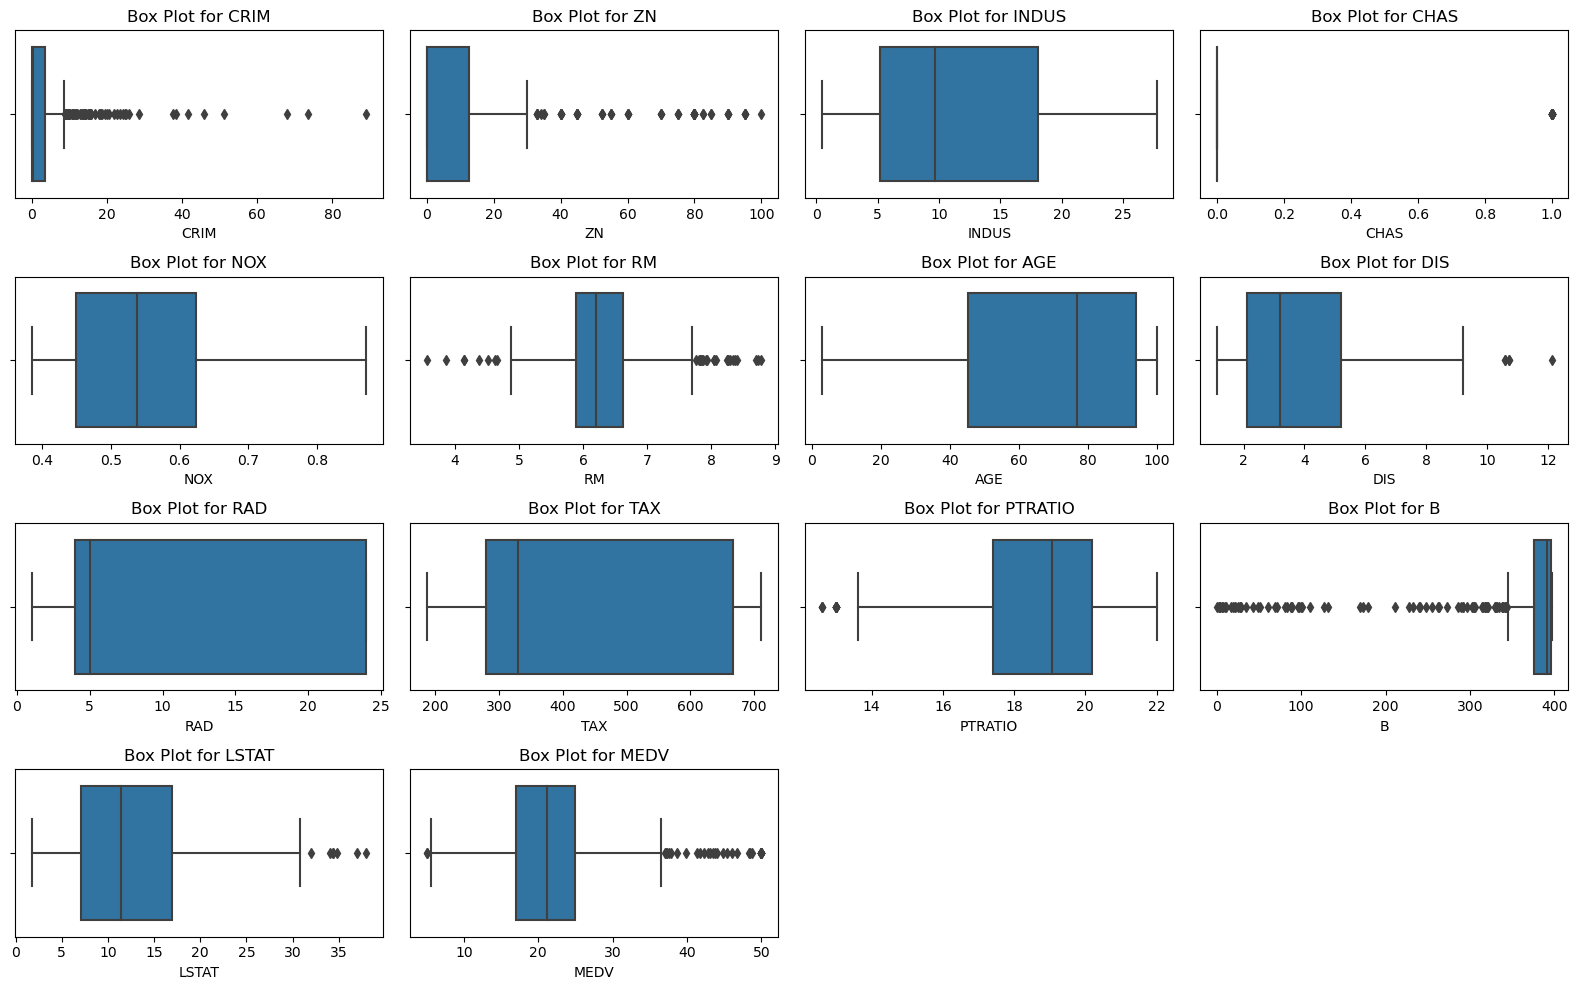


Statistical Information about Potential Outliers in CRIM:
356     8.98296
367    13.52220
371     9.23230
373    11.10810
374    18.49820
         ...   
468    15.57570
469    13.07510
477    15.02340
478    10.23300
479    14.33370
Name: CRIM, Length: 65, dtype: float64

Statistical Information about Potential Outliers in ZN:
39     75.0
40     75.0
54     75.0
55     90.0
56     85.0
       ... 
349    40.0
351    60.0
352    60.0
353    90.0
354    80.0
Name: ZN, Length: 63, dtype: float64

Statistical Information about Potential Outliers in INDUS:
Series([], Name: INDUS, dtype: float64)

Statistical Information about Potential Outliers in CHAS:
142    1.0
154    1.0
155    1.0
160    1.0
162    1.0
163    1.0
208    1.0
209    1.0
210    1.0
211    1.0
212    1.0
216    1.0
218    1.0
219    1.0
220    1.0
221    1.0
222    1.0
234    1.0
236    1.0
269    1.0
273    1.0
274    1.0
276    1.0
277    1.0
282    1.0
283    1.0
356    1.0
357    1.0
358    1.0
363    1.0
364    1.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = r'C:\Users\akans\OneDrive\Desktop\SEM_3\TERM_7\ML_T7\HousingData.csv'

df = pd.read_csv(csv_file_path)

columns_to_visualize = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
plt.figure(figsize=(16, 10))

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

outliers_threshold = 1.5

for column in columns_to_visualize:
    numeric_column = df[column]

    Q1 = numeric_column.quantile(0.25)
    Q3 = numeric_column.quantile(0.75)
    IQR = Q3 - Q1

    potential_outliers = (numeric_column < (Q1 - outliers_threshold * IQR)) | (numeric_column > (Q3 + outliers_threshold * IQR))

    print(f"\nStatistical Information about Potential Outliers in {column}:")
    print(df[potential_outliers][column])


## TEST_CASE_2:
## SCATTER_PLOT:

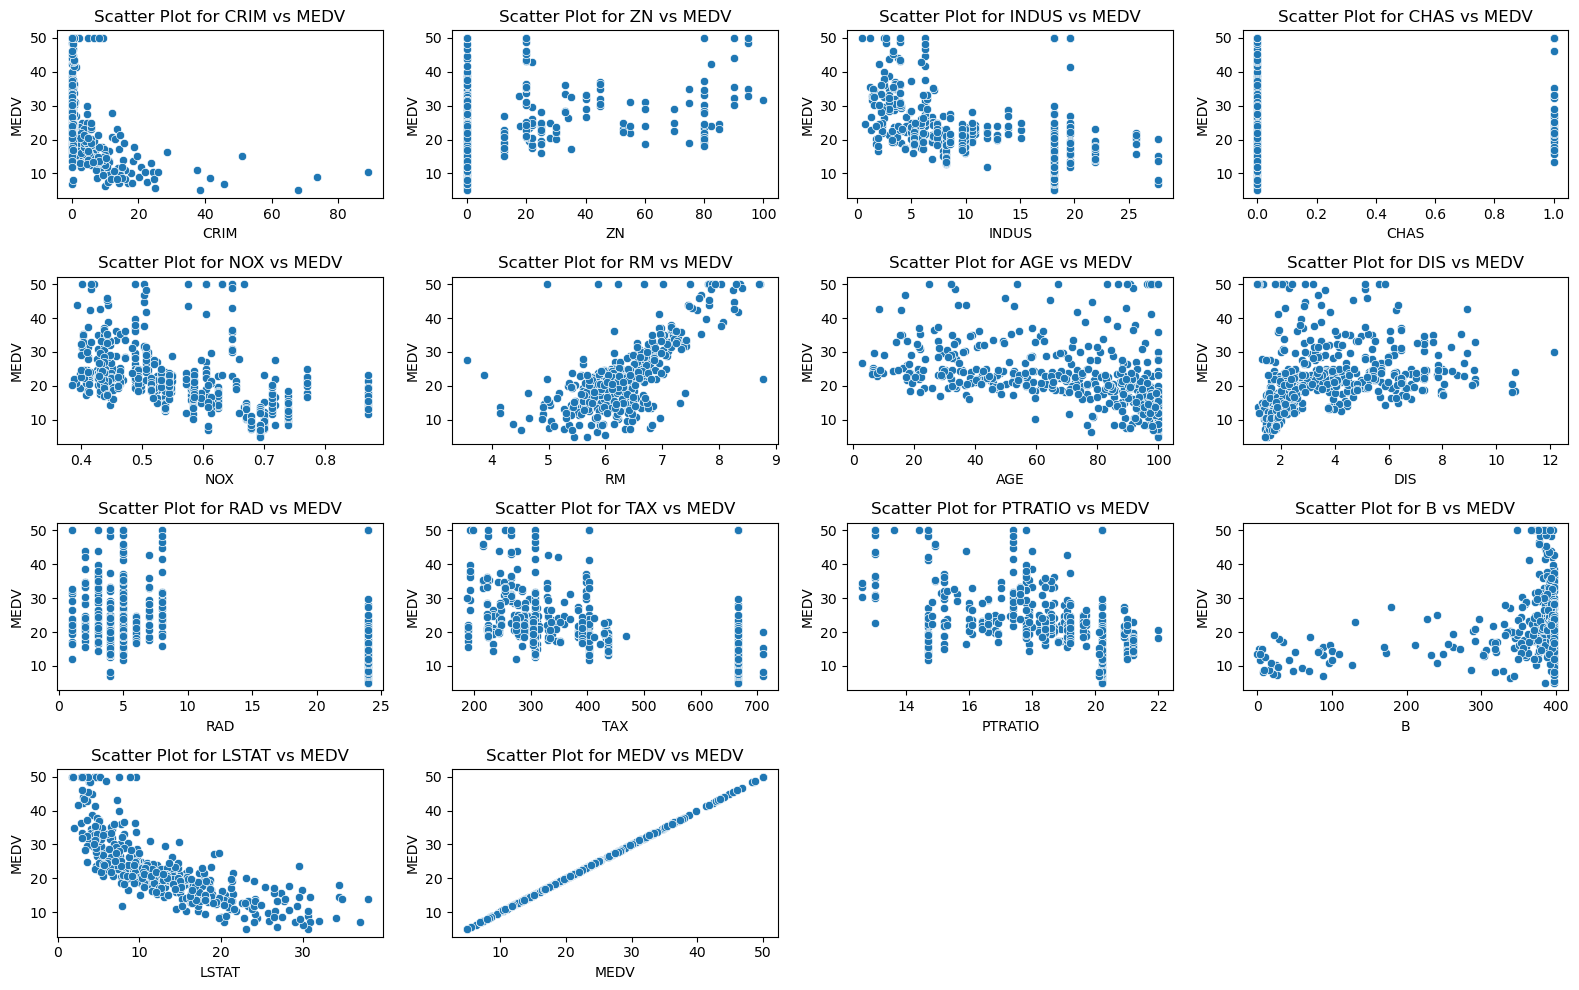

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
csv_file_path = r'C:\Users\akans\OneDrive\Desktop\SEM_3\TERM_7\ML_T7\HousingData.csv'
df = pd.read_csv(csv_file_path)
columns_to_visualize = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
plt.figure(figsize=(16, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=df[column], y=df['MEDV'])
    plt.title(f'Scatter Plot for {column} vs MEDV')
    plt.xlabel(column)
    plt.ylabel('MEDV')
plt.tight_layout()
plt.show()


## Implement a strategy to handle outliers (e.g., removal and transformation):

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import IsolationForest

csv_file_path = r'C:\Users\akans\OneDrive\Desktop\SEM_3\TERM_7\ML_T7\HousingData.csv'

df = pd.read_csv(csv_file_path)

columns_with_outliers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = df.dropna(subset=columns_with_outliers)

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_no_outliers = df.copy()

for column in columns_with_outliers:
    outliers = iso_forest.fit_predict(df[[column]])
    df_no_outliers = df_no_outliers.loc[df_no_outliers.index[outliers != -1]]

df_no_outliers.reset_index(drop=True, inplace=True)

pt = PowerTransformer()
df_transformed = df_no_outliers.copy()
df_transformed[columns_with_outliers] = pt.fit_transform(df_no_outliers[columns_with_outliers])

print("Original DataFrame:")
print(df.describe())

print("\nDataFrame without Outliers:")
print(df_no_outliers.describe())

print("\nTransformed DataFrame:")
print(df_transformed.describe())



C:\Users\akans\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\akans\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IndexError: boolean index did not match indexed array along dimension 0; dimension is 374 but corresponding boolean dimension is 394